# "Gender." / "Гендер"

### _"Classifying gender based on personal preferences" (Binary classification task)._ 
### _«Классификация пола на основе личных предпочтений» (задание на бинарную классификацию)._

## Table of Contents / Оглавление


## Part 0: Introduction / Часть 0: Введение

### Overview / Обзор
The dataset that's we see here contains 5 columns and 66 entries of data about personal preferences based on gender.

Набор данных, который мы видим здесь, содержит 5 столбцов и 66 записей данных о личных предпочтениях в зависимости от пола.

Gender is a social construct. The way males and females are treated differently since birth moulds their behaviour and personal preferences into what society expects for their gender.

Гендер – это социальный конструкт. То, как к мужчинам и женщинам относятся по-разному с момента рождения, формирует их поведение и личные предпочтения в соответствии с тем, что общество ожидает от их пола.

**Метаданные:**
    
* **Favorite Color** - Favorite color (colors reported by respondents were mapped to either warm, cool or neutral) / Любимый цвет (цвета, о которых сообщили респонденты, были отнесены к теплым, холодным или нейтральным)
 
* **Favorite Music Genre** - Favorite broad music genre / Любимый широкий музыкальный жанр

* **Favorite Beverage** - Favorite alcoholic drink / Любимый алкогольный напиток

* **Favorite Soft Drink** - Favorite fizzy drink / Любимый газированный напиток

* **Gender** - Binary gender / Бинарный пол



### Questions: / Вопросы:
    
Predict a person's gender based on their personal preferences (check balance of classes; calculate perdictions) / Предсказать пол человека на основе его личных предпочтений (проверить баланс классов, рассчитать прогнозы)


## [Part 1: Import, Load Data](#Part-1:-Import,-Load-Data.)
## Часть 1: Импорт, загрузка данных
* ### Import libraries, Read data from ‘.csv’ file / Импорт библиотек, чтение данных с '.csv' файла

## [Part 2: Exploratory Data Analysis](#Part-2:-Exploratory-Data-Analysis.)
## Часть2: Исследовательский анализ данных
* ### Info, Head / Инфо, заголовки
* ### Rename Columns / Переименование колонок
* ### Columns visualisation / Визуализация колонок
* ### 'gender' attribute value counts / Количество значений атрибута «пол»  
* ### Encode the Data / Кодировка данных

## [Part 3: Data Wrangling and Transformation](#Part-3:-Data-Wrangling-and-Transformation.)
## Часть 3: Обработка и преобразование данных
* ### Creating datasets for ML part / Создание наборов данных для части ML
* ### 'Train\Test' splitting method / Метод разделения Train\Test

## [Part 4: Machine Learning](#Part-4:-Machine-Learning.)
## Часть 4: Машинное обучение
* #### Build, train and evaluate model / Создание, обучение и оценка модели
* #### Logistic Regression / Логистическая регрессия
* #### Visualisation of predictions / Визуализация предсказаний
* #### Classification report / Отчет о классификации
* #### Confusion Matrix / Матрица ошибок
* #### ROC-AUC score / Оценка ROC-AUC

## [Conclusion](#Conclusion.)
## Выводы


## Part 1: Import, Load Data. 
## Импорт, Загрузка данных

* ### Import libraries / Импорт библиотек

In [23]:
# import standard libraries / импорт стандартных библиотек
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
import warnings

# Set seaborn style
sns.set(style="whitegrid")

# Ignore warnings
warnings.filterwarnings('ignore')

* ### Read data from ‘.csv’ file / Чтение данных с '.csv' файла

In [26]:
# read data from '.csv' file / Чтение данных с '.csv' файла
df = pd.read_csv('gender.csv')

## Part 2: Exploratory Data Analysis.
## Исследовательский анализ данных

* ### Info / Информация

In [27]:
# print the full summary of the dataset /  печать полной сводки набора данных 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Favorite Color        66 non-null     object
 1   Favorite Music Genre  66 non-null     object
 2   Favorite Beverage     66 non-null     object
 3   Favorite Soft Drink   66 non-null     object
 4   Gender                66 non-null     object
dtypes: object(5)
memory usage: 2.7+ KB


Dataset consists of 66 rows and 5 columns; / Набор данных состоит из 66 строк и 5 столбцов;

has 1 datatype: object(5); / имеет 1 тип данных: object(5);

has no missing values. / не имеет пропущенных значений.

* ### Head / Заголовки

In [28]:
# preview of the first 5 lines of the loaded data / предварительный просмотр первых 5 строк загруженных данных
df.head()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F


* ### Rename Columns / Переименование колонок

In [29]:
# columns rename / переименование колонок
df.columns = ['color', 'music', 'beverage', 'softdrink', 'gender']
df.columns

Index(['color', 'music', 'beverage', 'softdrink', 'gender'], dtype='object')

* ### Columns visualisation / Визуализация колонок

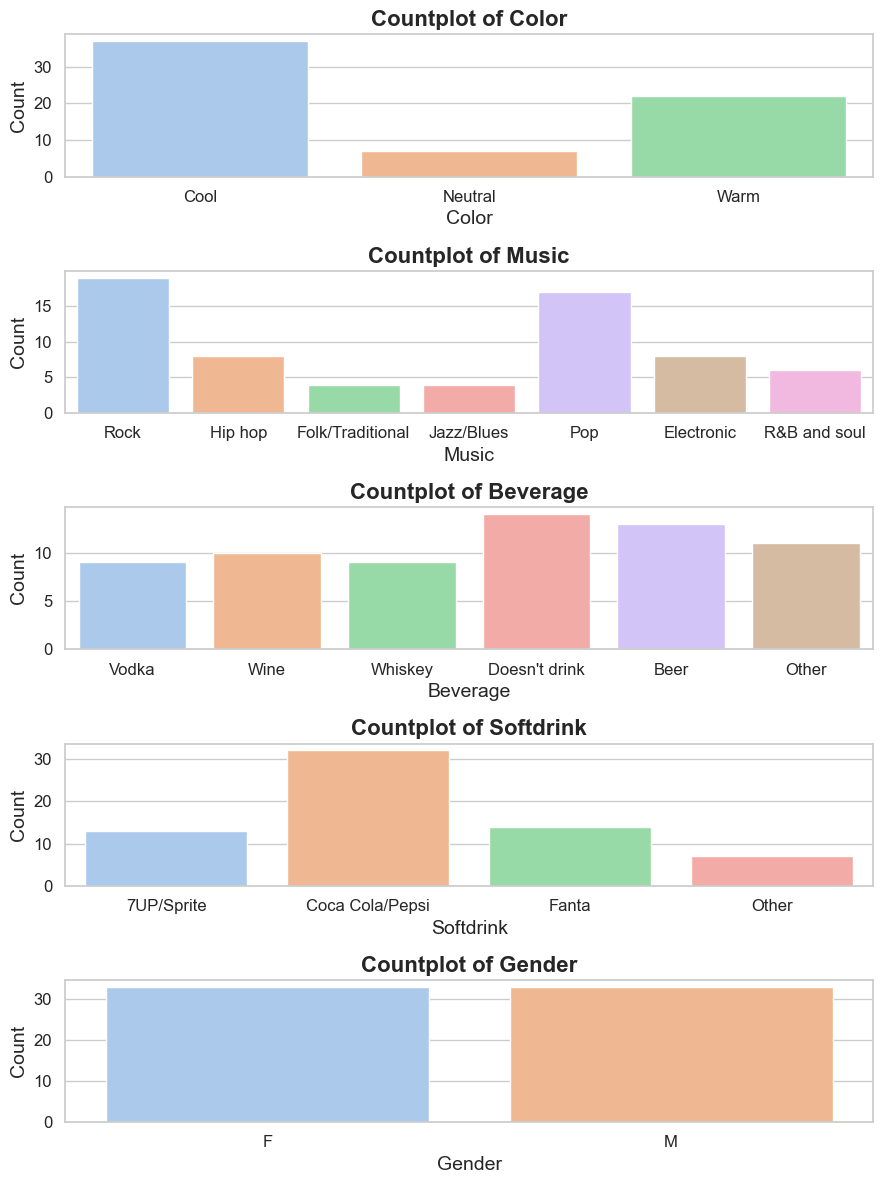

In [32]:
# Columns visualisation / визуализация колонок
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(9, 12))

# Define a color palette
palette = sns.color_palette("pastel")

for i, col in enumerate(df.columns):
    sns.countplot(data=df, x=col, ax=axes[i], palette=palette)
    axes[i].set_title(f'Countplot of {col.capitalize()}', fontsize=16, fontweight='bold')
    axes[i].set_xlabel(col.capitalize(), fontsize=14)
    axes[i].set_ylabel('Count', fontsize=14)
    axes[i].tick_params(axis='both', which='major', labelsize=12)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

* ### 'gender' attribute value counts / количество значений атрибута «пол»

In [7]:
# 'gender' value counts / количество значений атрибута «пол»
df['gender'].value_counts()

gender
F    33
M    33
Name: count, dtype: int64

There are 33 of 'Female' and 33 of 'Male' in our dataset. This means that our dataset is balanced. / В нашем наборе данных 33 «женщины» и 33 «мужчины». Это означает, что наш набор данных сбалансирован.

* ### Encode the Data / Кодировка данных

In [34]:
# Label encoding / кодировка метки
label_encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le
data.head()

,color,music,beverage,softdrink,gender
0,0,6,3,0,0
1,1,2,3,1,0
2,2,6,5,1,0
3,2,1,4,2,0
4,0,6,3,1,0


## Part 3: Data Wrangling and Transformation.
## Обработка и преобразование данных

* ### Creating datasets for ML part / Создание наборов данных для части ML

In [35]:
# set 'X' for features' and y' for the target ('gender'). / установка «X» для характеристик и «y» для цели («пол»).
y = df['gender']
X = df.drop(['gender'], axis=1)

* ### 'Train\Test' split / Разделение Train\Test

In [36]:
# 'Train\Test' splitting method / метод разделения Train\Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Part 4: Machine Learning.
## Машинное обучение.

* ### Build, train and evaluate model / Построение, тренировка и оценка модели

### Logistic Regression / Логистическая регрессия

In [37]:
# Logistic Regression model / Модель логистической регрессии
LR = LogisticRegression(random_state=0)
LR.fit(X_train, y_train)
LR_pred = LR.predict(X_test)

In [38]:
# LR predictions / Предсказание логистической регрессии
LR_pred

array([1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0],
      dtype=int64)

* ### Visualisation of predictions / Визуализация предсказания

In [43]:
# Visual comparison between Actual 'Gender' and Predicted 'Gender' / визуальное сравнение фактического «пола» и прогнозируемого «пола»
actualvspredicted = pd.DataFrame({"Actual Gender": y_test, "LR Predicted Gender": LR_pred})
actualvspredicted.head(10).style.background_gradient(cmap='Blues')

,Actual Gender,LR Predicted Gender
45,1,1
28,0,1
29,0,1
55,1,1
63,1,1
31,0,0
51,1,0
46,1,0
34,1,1
4,0,0


* ### Classification report / Отчет о классификации

In [47]:
# Classification report of LR model / отчет о классификации модели LR
print("LR Classification Report: \n", classification_report(y_test, LR_pred, digits=6))

LR Classification Report: 
               precision    recall  f1-score   support

           0   0.636364  0.777778  0.700000         9
           1   0.777778  0.636364  0.700000        11

    accuracy                       0.700000        20
   macro avg   0.707071  0.707071  0.700000        20
weighted avg   0.714141  0.700000  0.700000        20



* ### Confusion matrix / Матрица ошибок

LR Confusion Matrix


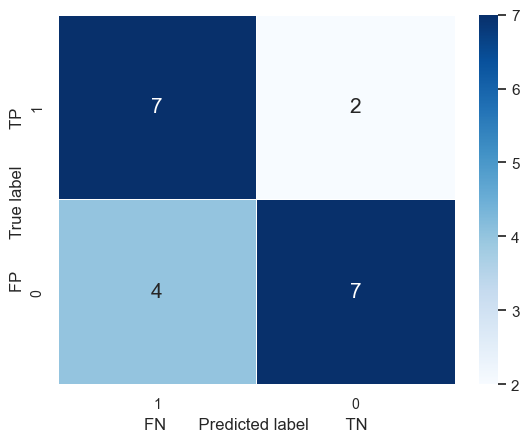

In [49]:
# confusion matrix of LR model / матрица ошибок регрессионной модели
LR_confusion_mx = confusion_matrix(y_test, LR_pred)
print('LR Confusion Matrix')

# visualisation / визуализация
ax = plt.subplot()
sns.heatmap(LR_confusion_mx, annot = True, fmt = 'd', cmap = 'Blues', ax = ax, linewidths = 0.5, annot_kws = {'size': 15})
ax.set_ylabel('FP       True label        TP')
ax.set_xlabel('FN       Predicted label        TN')
ax.xaxis.set_ticklabels(['1', '0'], fontsize = 10)
ax.yaxis.set_ticklabels(['1', '0'], fontsize = 10)
plt.show()
print() 

* ### ROC-AUC score / Оценка ROC-AUC

In [54]:
# ROC-AUC score of LR model / Оценка ROC-AUC модели LR
roc_auc_score(LR_pred, y_test)

0.7070707070707071

##  Conclusion. 
## Выводы

**The main question** was: Predict a person's gender based on their personal preferences (check balance of classes; calculate perdictions). / **Основной вопрос** заключался в следующем: предсказать пол человека на основе его личных предпочтений (проверить баланс занятий, рассчитать прогнозы).

**Answers**: / **Ответы**:

1. The data is too small. Only 66 instances. / Данных слишком мало. Всего 66 экземпляров.

2. The classes are balanced. / Классы сбалансированы

3. Logistic Regression model was choosen. Predictions (with visual comparison) were done with an accuracy of the model equal 0.7, no hyper parameters were applied. / Была выбрана модель логистической регрессии. Прогнозы (с визуальным сравнением) делались с точностью модели 0,7, гиперпараметры не применялись.

### Дополнительно: Метод ближайших соседей (K-Nearest Neighbors)

In [17]:
#импорт библиотеки
from sklearn.neighbors import KNeighborsClassifier

In [55]:
# Модель K-Nearest Neighbors
KNN = KNeighborsClassifier()
KNN_params = {'n_neighbors': [5, 7, 9, 11]}
KNN = GridSearchCV(KNN, param_grid=KNN_params)
KNN.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 7, 9, 11]})

In [56]:
# KNN predictions / Предсказание логистической регрессии
KNN_pred = KNN.predict(X_test)

In [57]:
# Classification report
print("KNN Classification Report: \n", classification_report(y_test, KNN_pred, digits=6))

KNN Classification Report: 
               precision    recall  f1-score   support

           0   0.500000  0.555556  0.526316         9
           1   0.600000  0.545455  0.571429        11

    accuracy                       0.550000        20
   macro avg   0.550000  0.550505  0.548872        20
weighted avg   0.555000  0.550000  0.551128        20



* ### Visualisation of predictions / Визуализация предсказания

In [61]:
# visual comparison between Actual 'Gender' and Predicted 'Gender' / визуальное сравнение фактического «пола» и прогнозируемого «пола»
actualvspredicted = pd.DataFrame({"Actual Gender":y_test,"LR Predicted Gender":LR_pred, "KNN Predicted Gender":KNN_pred})
actualvspredicted.head(10).style.background_gradient(cmap='Blues')

,Actual Gender,LR Predicted Gender,KNN Predicted Gender
45,1,1,1
28,0,1,0
29,0,1,1
55,1,1,1
63,1,1,1
31,0,0,0
51,1,0,0
46,1,0,0
34,1,1,0
4,0,0,1


### Confusion matrix / Матрица ошибок

KNN Confusion Matrix


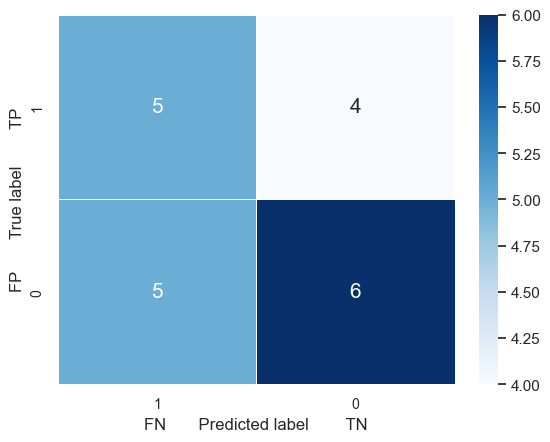

In [63]:
# confusion matrix of KNN model / матрица ошибок метода ближайших соседей
KNN_confusion_mx = confusion_matrix(y_test, KNN_pred)
print('KNN Confusion Matrix')

# visualisation / визуализация
ax = plt.subplot()
sns.heatmap(KNN_confusion_mx, annot = True, fmt = 'd', cmap = 'Blues', ax = ax, linewidths = 0.5, annot_kws = {'size': 15})
ax.set_ylabel('FP       True label        TP')
ax.set_xlabel('FN       Predicted label        TN')
ax.xaxis.set_ticklabels(['1', '0'], fontsize = 10)
ax.yaxis.set_ticklabels(['1', '0'], fontsize = 10)
plt.show()
print() 

* ### ROC-AUC score / Оценка ROC-AUC

In [64]:
# ROC-AUC score of KNN model / Оценка ROC-AUC модели KNN
roc_auc_score(KNN_pred, y_test)

0.55

#### Вывод: метод K-Nearest Neighbors для решения задачи не подходит

### Дополнительно: Метод по теореме Байеса (Naive Bayes)

In [66]:
#импорт библиотеки
from sklearn.naive_bayes import GaussianNB

In [67]:
# Model Naive Bayes
NB = GaussianNB()            
NB.fit(X_train, y_train)
NB_pred = NB.predict(X_test)

In [68]:
# KNN1 predictions / Предсказание теоремы Байеса
NB_pred

array([1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0],
      dtype=int64)

In [69]:
# Classification report
print("NB Classification Report: \n", classification_report(y_test, NB_pred, digits = 6))

NB Classification Report: 
               precision    recall  f1-score   support

           0   0.666667  0.888889  0.761905         9
           1   0.875000  0.636364  0.736842        11

    accuracy                       0.750000        20
   macro avg   0.770833  0.762626  0.749373        20
weighted avg   0.781250  0.750000  0.748120        20



* ### Visualisation of predictions / Визуализация предсказания

In [70]:
# visual comparison between Actual 'Gender' and Predicted 'Gender' / визуальное сравнение фактического «пола» и прогнозируемого «пола»
actualvspredicted = pd.DataFrame({"Actual Gender":y_test,"LR Predicted Gender":LR_pred, "NB Predicted Gender":NB_pred})
actualvspredicted.head(15).style.background_gradient(cmap='Blues')

,Actual Gender,LR Predicted Gender,NB Predicted Gender
45,1,1,1
28,0,1,0
29,0,1,1
55,1,1,1
63,1,1,1
31,0,0,0
51,1,0,1
46,1,0,0
34,1,1,0
4,0,0,0


### Confusion matrix / Матрица ошибок

NB Confusion Matrix


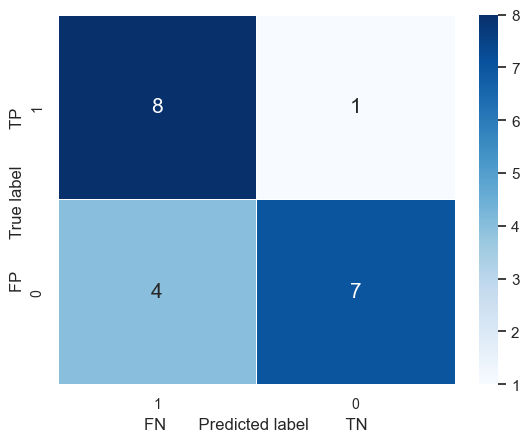

In [71]:
# confusion matrix of NB model / матрица ошибок модели по теореме Байеса
NB_confusion_mx = confusion_matrix(y_test, NB_pred)
print('NB Confusion Matrix')

# visualisation / визуализация
ax = plt.subplot()
sns.heatmap(NB_confusion_mx, annot = True, fmt = 'd', cmap = 'Blues', ax = ax, linewidths = 0.5, annot_kws = {'size': 15})
ax.set_ylabel('FP       True label        TP')
ax.set_xlabel('FN       Predicted label        TN')
ax.xaxis.set_ticklabels(['1', '0'], fontsize = 10)
ax.yaxis.set_ticklabels(['1', '0'], fontsize = 10)
plt.show()
print() 

* ### ROC-AUC score / Оценка ROC-AUC

In [72]:
# ROC-AUC score of NB model / Оценка ROC-AUC модели NB
roc_auc_score(NB_pred, y_test)

0.7708333333333335

#### Вывод: модель теоремы Байеса для решения задачи подходит лучше

### Дополнительно: модель Машины опорных векторов (Support Vector Machine

In [73]:
#импорт библиотеки
from sklearn.svm import LinearSVC

In [74]:
# Model Support Vector Machine
SVM = LinearSVC()            
SVM.fit(X_train, y_train)
SVM_pred = SVM.predict(X_test)

In [75]:
# SVM predictions / Предсказание теоремы Байеса
SVM_pred

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
      dtype=int64)

In [76]:
# Classification report
print("SVM Classification Report: \n", classification_report(y_test, NB_pred, digits = 6))

SVM Classification Report: 
               precision    recall  f1-score   support

           0   0.666667  0.888889  0.761905         9
           1   0.875000  0.636364  0.736842        11

    accuracy                       0.750000        20
   macro avg   0.770833  0.762626  0.749373        20
weighted avg   0.781250  0.750000  0.748120        20



* ### Visualisation of predictions / Визуализация предсказания

In [77]:
# visual comparison between Actual 'Gender' and Predicted 'Gender' / визуальное сравнение фактического «пола» и прогнозируемого «пола»
actualvspredicted = pd.DataFrame({"Actual Gender":y_test,"LR Predicted Gender":LR_pred, "SVM Predicted Gender":SVM_pred})
actualvspredicted.head(10).style.background_gradient(cmap='Blues')

,Actual Gender,LR Predicted Gender,SVM Predicted Gender
45,1,1,1
28,0,1,1
29,0,1,1
55,1,1,1
63,1,1,1
31,0,0,0
51,1,0,0
46,1,0,0
34,1,1,0
4,0,0,0


### Confusion matrix / Матрица ошибок

SVM Confusion Matrix


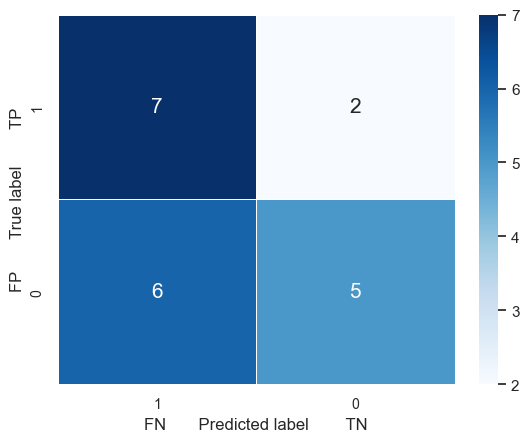

In [78]:
# confusion matrix of SVM model / матрица ошибок модели машины опорных векторов
SVM_confusion_mx = confusion_matrix(y_test, SVM_pred)
print('SVM Confusion Matrix')

# visualisation / визуализация
ax = plt.subplot()
sns.heatmap(SVM_confusion_mx, annot = True, fmt = 'd', cmap = 'Blues', ax = ax, linewidths = 0.5, annot_kws = {'size': 15})
ax.set_ylabel('FP       True label        TP')
ax.set_xlabel('FN       Predicted label        TN')
ax.xaxis.set_ticklabels(['1', '0'], fontsize = 10)
ax.yaxis.set_ticklabels(['1', '0'], fontsize = 10)
plt.show()
print() 

* ### ROC-AUC score / Оценка ROC-AUC

In [79]:
# ROC-AUC score of SVM model / Оценка ROC-AUC модели SVM
roc_auc_score(SVM_pred, y_test)

0.6263736263736264

#### Вывод: модель опорных векторов лучше всего подходит для решения задачи

### Дополнительно: модель дерева решений (Decision Tree Classifier)

In [80]:
#импорт библиотеки
from sklearn.tree import DecisionTreeClassifier

In [81]:
# Model Decision Tree Classifier
DTC = DecisionTreeClassifier()            
DTC.fit(X_train, y_train)
DTC_pred = DTC.predict(X_test)

In [82]:
# DTC predictions / Предсказание модели дерева решений
DTC_pred

array([1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1],
      dtype=int64)

In [83]:
# Classification report
print("DTC Classification Report: \n", classification_report(y_test, DTC_pred, digits = 6))

DTC Classification Report: 
               precision    recall  f1-score   support

           0   0.800000  0.444444  0.571429         9
           1   0.666667  0.909091  0.769231        11

    accuracy                       0.700000        20
   macro avg   0.733333  0.676768  0.670330        20
weighted avg   0.726667  0.700000  0.680220        20



* ### Visualisation of predictions / Визуализация предсказания

In [84]:
# visual comparison between Actual 'Gender' and Predicted 'Gender' / визуальное сравнение фактического «пола» и прогнозируемого «пола»
actualvspredicted = pd.DataFrame({"Actual Gender":y_test,"LR Predicted Gender":LR_pred, "DTC Predicted Gender":DTC_pred})
actualvspredicted.head(10).style.background_gradient(cmap='Blues')

,Actual Gender,LR Predicted Gender,DTC Predicted Gender
45,1,1,1
28,0,1,0
29,0,1,1
55,1,1,1
63,1,1,1
31,0,0,0
51,1,0,1
46,1,0,0
34,1,1,1
4,0,0,1


### Confusion matrix / Матрица ошибок

DTC Confusion Matrix


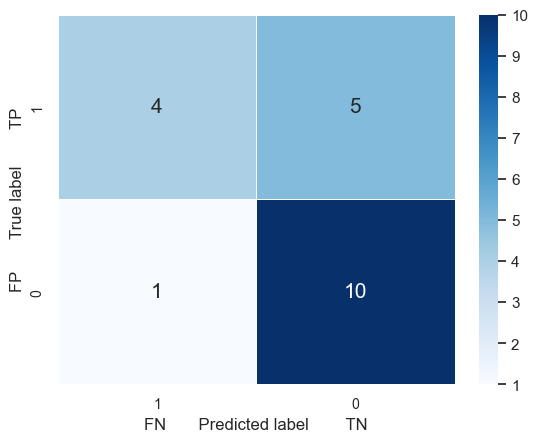

In [85]:
# confusion matrix of DTC model / матрица ошибок модели дерева решений
DTC_confusion_mx = confusion_matrix(y_test, DTC_pred)
print('DTC Confusion Matrix')

# visualisation / визуализация
ax = plt.subplot()
sns.heatmap(DTC_confusion_mx, annot = True, fmt = 'd', cmap = 'Blues', ax = ax, linewidths = 0.5, annot_kws = {'size': 15})
ax.set_ylabel('FP       True label        TP')
ax.set_xlabel('FN       Predicted label        TN')
ax.xaxis.set_ticklabels(['1', '0'], fontsize = 10)
ax.yaxis.set_ticklabels(['1', '0'], fontsize = 10)
plt.show()
print() 

* ### ROC-AUC score / Оценка ROC-AUC

In [86]:
# ROC-AUC score of DTC model / Оценка ROC-AUC модели DTC
roc_auc_score(DTC_pred, y_test)

0.7333333333333333

#### Вывод: модель дерева решений для решения задачи не подходит

### Дополнительно: модель случайного леса (Random Forest Classifier)

In [87]:
#импорт библиотеки
from sklearn.ensemble import RandomForestClassifier

In [88]:
# Model Random Forest Classifier
RFC = RandomForestClassifier()            
RFC.fit(X_train, y_train)
RFC_pred = RFC.predict(X_test)

In [89]:
# DTC predictions / Предсказание модели дерева решений
RFC_pred

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1],
      dtype=int64)

In [90]:
# Classification report
print("RFC Classification Report: \n", classification_report(y_test, RFC_pred, digits = 6))

RFC Classification Report: 
               precision    recall  f1-score   support

           0   0.555556  0.555556  0.555556         9
           1   0.636364  0.636364  0.636364        11

    accuracy                       0.600000        20
   macro avg   0.595960  0.595960  0.595960        20
weighted avg   0.600000  0.600000  0.600000        20



* ### Visualisation of predictions / Визуализация предсказания

In [91]:
# visual comparison between Actual 'Gender' and Predicted 'Gender' / визуальное сравнение фактического «пола» и прогнозируемого «пола»
actualvspredicted = pd.DataFrame({"Actual Gender":y_test,"LR Predicted Gender":LR_pred, "RFC Predicted Gender":RFC_pred})
actualvspredicted.head(10).style.background_gradient(cmap='Blues')

,Actual Gender,LR Predicted Gender,RFC Predicted Gender
45,1,1,1
28,0,1,0
29,0,1,1
55,1,1,1
63,1,1,1
31,0,0,1
51,1,0,0
46,1,0,0
34,1,1,1
4,0,0,1


### Confusion matrix / Матрица ошибок

RFC Confusion Matrix


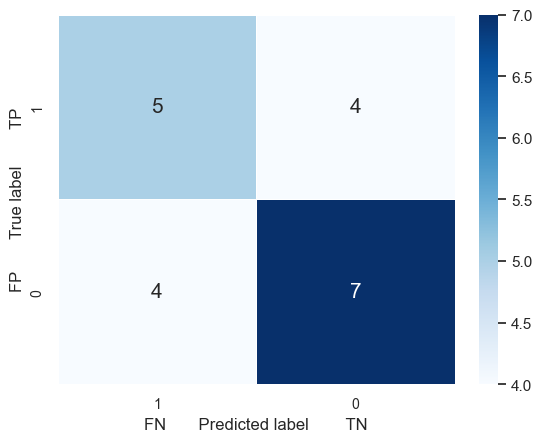

In [92]:
# confusion matrix of RFC model / матрица ошибок модели случайного леса
RFC_confusion_mx = confusion_matrix(y_test, RFC_pred)
print('RFC Confusion Matrix')

# visualisation / визуализация
ax = plt.subplot()
sns.heatmap(RFC_confusion_mx, annot = True, fmt = 'd', cmap = 'Blues', ax = ax, linewidths = 0.5, annot_kws = {'size': 15})
ax.set_ylabel('FP       True label        TP')
ax.set_xlabel('FN       Predicted label        TN')
ax.xaxis.set_ticklabels(['1', '0'], fontsize = 10)
ax.yaxis.set_ticklabels(['1', '0'], fontsize = 10)
plt.show()
print() 

* ### ROC-AUC score / Оценка ROC-AUC

In [93]:
# ROC-AUC score of RFC model / Оценка ROC-AUC модели RFC
roc_auc_score(RFC_pred, y_test)

0.5959595959595959

#### Вывод: модель случайного леса для решения задачи не подходит

### Дополнительно: Метод градиентного бустинга (Gradient Boosting Regressor)

In [94]:
#import model / импорт модели
from sklearn.ensemble import GradientBoostingClassifier


In [95]:
# Model Gradient Boosting Regressor
GBR = GradientBoostingClassifier()
GBR.fit(X_train, y_train)
GBR_pred = GBR.predict(X_test)

In [96]:
# GBR predictions / Предсказание модели градиентного бустинга
GBR_pred

array([1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1],
      dtype=int64)

In [97]:
# Classification report
print("GBR Classification Report: \n", classification_report(y_test, GBR_pred, digits = 6))

GBR Classification Report: 
               precision    recall  f1-score   support

           0   0.625000  0.555556  0.588235         9
           1   0.666667  0.727273  0.695652        11

    accuracy                       0.650000        20
   macro avg   0.645833  0.641414  0.641944        20
weighted avg   0.647917  0.650000  0.647315        20



In [98]:
# visual comparison between Actual 'Gender' and Predicted 'Gender' / визуальное сравнение фактического «пола» и прогнозируемого «пола»
actualvspredicted = pd.DataFrame({"Actual Gender":y_test,"LR Predicted Gender":LR_pred, "GBR Predicted Gender":GBR_pred})
actualvspredicted.head(10).style.background_gradient(cmap='Blues')

,Actual Gender,LR Predicted Gender,GBR Predicted Gender
45,1,1,1
28,0,1,0
29,0,1,1
55,1,1,1
63,1,1,1
31,0,0,0
51,1,0,1
46,1,0,0
34,1,1,1
4,0,0,1


### Confusion matrix / Матрица ошибок

GBR Confusion Matrix


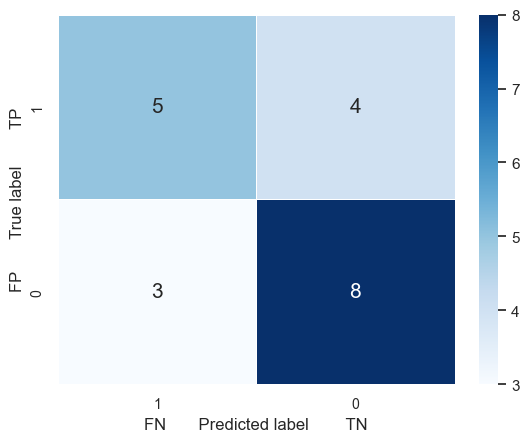

In [99]:
# confusion matrix of GBR model / матрица ошибок модели градиентного бустинга
GBR_confusion_mx = confusion_matrix(y_test, GBR_pred)
print('GBR Confusion Matrix')

# visualisation / визуализация
ax = plt.subplot()
sns.heatmap(GBR_confusion_mx, annot = True, fmt = 'd', cmap = 'Blues', ax = ax, linewidths = 0.5, annot_kws = {'size': 15})
ax.set_ylabel('FP       True label        TP')
ax.set_xlabel('FN       Predicted label        TN')
ax.xaxis.set_ticklabels(['1', '0'], fontsize = 10)
ax.yaxis.set_ticklabels(['1', '0'], fontsize = 10)
plt.show()
print() 

* ### ROC-AUC score / Оценка ROC-AUC

In [100]:
# ROC-AUC score of GBR model / Оценка ROC-AUC модели GBR
roc_auc_score(GBR_pred, y_test)

0.6458333333333333

#### Вывод: модель градиентного бустинга для решения задачи не подходит